In [1]:
import pathlib
import os
import sys

PROJECT_DIRECTORY = pathlib.PurePath(os.getcwd()).parent

project_directory = str(PROJECT_DIRECTORY)
if project_directory not in sys.path:
    sys.path.insert(0, project_directory)
print(project_directory)

g:\Python\fusion_detector


In [2]:
from src.fusion_detector import perturbation, dataset

batch = dataset.CifarBatchDataset(8).batch
x, labels = batch

image = x[1]
print(image.requires_grad)

False


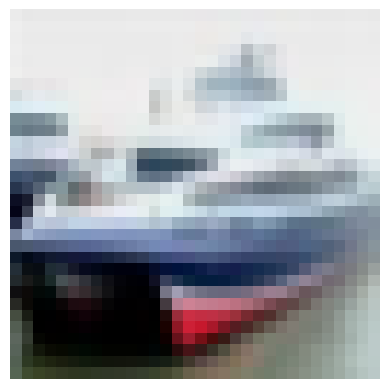

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

original = image.clone().detach()

mean = (0.4914, 0.4822, 0.4465)
std = (0.2471, 0.2435, 0.2616)
for channel in range(3):
    original[channel].mul_(std[channel]).add_(mean[channel])

plt.axis("off")
plt.imshow(T.ToPILImage()(original))
plt.show()

In [4]:
from src.fusion_detector.thirdparty.pytorch_cifar10 import module as M

vgg = M.vgg19_bn(pretrained=True)

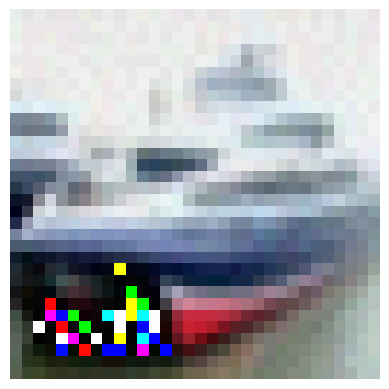

In [23]:
attack = perturbation.fgsm(vgg, epsilon=0.05)

adversarial = attack(image.unsqueeze(0))
adversarial_show = adversarial.squeeze().clone().detach()

for channel in range(3):
    adversarial_show[channel].mul_(std[channel]).add_(mean[channel])

plt.axis("off")
plt.imshow(T.ToPILImage()(adversarial_show))
plt.show()

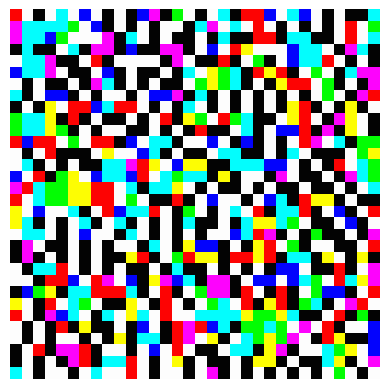

In [24]:
difference = adversarial_show - original
plt.axis("off")
plt.imshow(T.ToPILImage()(difference))
plt.show()